<a href="https://colab.research.google.com/github/nazilaeshghi/from-rep/blob/main/NazilaEshghi_Homework2_ML_zoomcamp_regression_laptops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating a regression model to predict price of laptops

## Load Data and Required Libraries
In this homework, we will use the Laptops price dataset from Kaggle.

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv):

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv


--2024-10-08 15:32:49--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 298573 (292K) [text/plain]
Saving to: ‘laptops.csv’

laptops.csv         100%[===================>] 291.58K  --.-KB/s    in 0.04s   

2024-10-08 15:32:49 (7.69 MB/s) - ‘laptops.csv’ saved [298573/298573]



In [ ]:
# Load the dataframe.
df = pd.read_csv('laptops.csv')

## Preparing the dataset


1.   Transforming the names of the columns to lowercase and put underlines instead of spaces
2.   Extracting the columns ```ram```, ```storage```, ```screen```, ```final_price```
3.	Look at the final_price variable. Does it have a long tail?



In [ ]:
# Transforming the names of the columns to lowercase and put underlines instead of spaces
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [ ]:
# Extracting the columns 'ram', 'storage', 'screen', 'final_price'
base = ['ram', 'storage', 'screen', 'final_price']
data = df[base]
data

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


Text(0.5, 1.0, 'Distribution of prices')

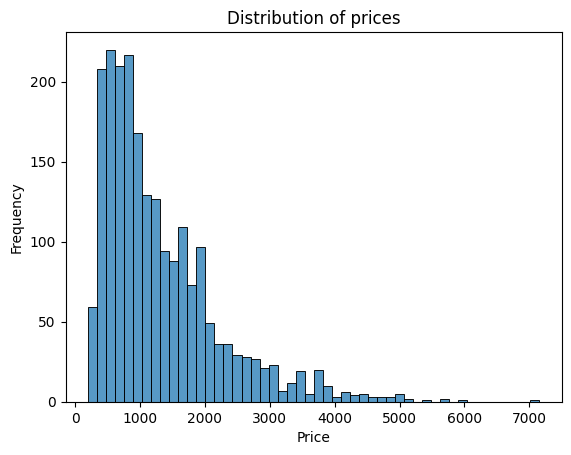

In [ ]:
# Looking at the final_price variable. Does it have a long tail?
# Yes. this is a long-tailed distribution
sns.histplot(df.final_price, bins=50)

plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

Text(0.5, 1.0, 'Distribution of log+1 of prices')

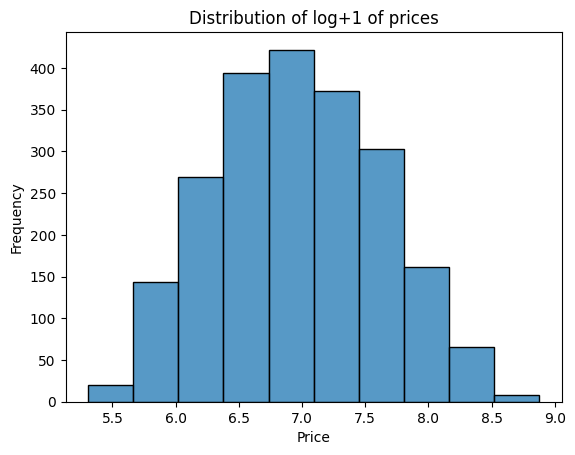

In [ ]:
# Normalization long tail
Y = np.log1p(data.final_price.values)
sns.histplot(Y, bins=10)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of log+1 of prices')

## Question 1
There's one column with missing values. What is it?

In [ ]:
data.isnull().sum()

# the column 'screen' has null values

,0
ram,0
storage,0
screen,4
final_price,0


## Question 2
What's the median (50% percentile) for variable ```'ram'```

In [ ]:
data['ram'].median()


16.0

## Prepare and split the dataset
*   Shuffle the dataset (the filtered one you created above), use seed 42.
*   Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [ ]:
# Shuffle the dataset
np.random.seed(42)
idx = np.arange(len(data))
np.random.shuffle(idx)

# Split the data
n = len(data)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

df_train = data.iloc[idx[:n_train]]
df_val = data.iloc[idx[n_train:n_train + n_val]]
df_test = data.iloc[idx[n_train + n_val:]]

## Question 3
*   We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the **training** only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [ ]:
# # defining required functions:
# #  training a linear regression function

# def train_linear_regression(X, y):
#     ones = np.ones(X.shape[0])
#     X = np.column_stack([ones, X])

#     XTX = X.T.dot(X)
#     XTX_inv = np.linalg.inv(XTX)
#     w = XTX_inv.dot(X.T).dot(y)

#     return w[0], w[1:]

# # RMSE function

# def rmse(y, y_pred):
#     MSE = ((y_pred - y) ** 2).mean()
#     return np.sqrt(MSE)

In [ ]:
# filling_vlaues = [0,  X_train.screen.mean() ]
# for val in filling_vlaues:
#   X_train_clean = X_train.copy()
#   X_train_clean = X_train_clean.fillna(val)

#   # train linear regression with cleaned data(using mean values and zero)
#   w_0, w = train_linear_regression(X_train_clean, y_train) #trining the data

#   # finding predicted y
#   y_pred =  w_0 + X_val.dot(w)

#   # RMSE for this dataset
#   RMSE = rmse(y_val, y_pred).round(2)

#   #printing the result in the required format
#   print('RMSE when we used %2d to clean X is %.2f'%(val, RMSE))

In [ ]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

# Option 1: Fill missing values with 0
X_train = df_train.fillna(0).drop(columns=['final_price']).values
y_train = df_train['final_price'].values
X_val = df_val.fillna(0).drop(columns=['final_price']).values
y_val = df_val['final_price'].values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_val.dot(w)
rmse_option1 = round(rmse(y_val, y_pred), 2)

# Option 2: Fill missing values with the mean
X_train = df_train.fillna(df_train.mean()).drop(columns=['final_price']).values
y_train = df_train['final_price'].values
X_val = df_val.fillna(df_train.mean()).drop(columns=['final_price']).values
y_val = df_val['final_price'].values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_val.dot(w)
rmse_option2 = round(rmse(y_val, y_pred), 2)

print(f"RMSE (Option 1): {rmse_option1}")
print(f"RMSE (Option 2): {rmse_option2}")

RMSE (Option 1): 597.36
RMSE (Option 2): 600.27


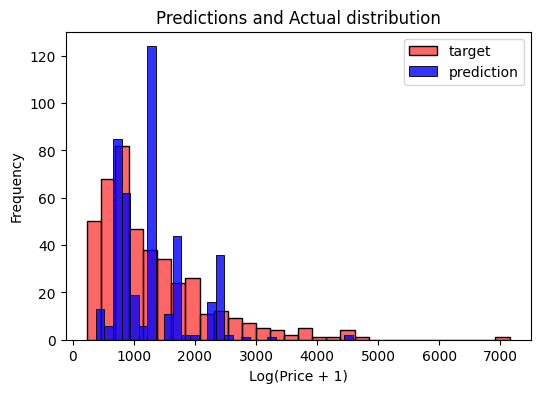

In [ ]:
plt.figure(figsize=(6, 4))


sns.histplot(y_val, label='target', color='red', alpha=0.6, bins=30)
sns.histplot(y_pred, label='prediction', color='blue', alpha=0.8, bins=30)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions and Actual distribution')

plt.show()

As we see, we should do better in training the model and engineering the features, but the predictions are not very bad. They are not biased

## Question 4
* Now let's train a regularized linear regression.
* For this question, fill the NAs with ```0```.
* Try different values of r from this list: ```[0, 0.01, 0.1, 1, 5, 10, 100].```
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
Which ```r``` gives the best RMSE?

In [ ]:
# defining required functions:
#=====================================================================
#  training a Regularized linear regression function
#=====================================================================

# def train_regularized_linear_regression(X, y, r=0):
#     '''
#     Simple Linear regression function with completely cleaned data
#     and regularization (adding small values to diagonal elements of
#     data so that the reversed matrix exist and has finite small values)
#     '''
#     ones = np.ones(X.shape[0])
#     X = np.column_stack([ones, X])

#     XTX = X.T.dot(X)
#     reg = r * np.eye(XTX.shape[0])
#     XTX = XTX + reg

#     XTX_inv = np.linalg.inv(XTX)
#     w = XTX_inv.dot(X.T).dot(y)

#     return w[0], w[1:]

In [ ]:
import numpy as np

# Defining the train_regularized_linear_regression function (from your previous code)
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

X_train = df_train.fillna(0).drop(columns=['final_price']).values
y_train = df_train['final_price'].values
X_val = df_val.fillna(0).drop(columns=['final_price']).values
y_val = df_val['final_price'].values

best_rmse = float('inf')
best_r = None

for r in [0, 0.01, 0.1, 1, 10, 100]:  # Use the specified values of r
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)

    if rmse_val < best_rmse:
        best_rmse = rmse_val
        best_r = r

print(f'The best r is {best_r}, with RMSE = {round(best_rmse,2)}')

The best r is 10, with RMSE = 597.06


## Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: ```[0, 1, 2, 3, 4, 5, 6, 7, 8, 9].```
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits ```(round(std, 3))```
What's the value of std?

In [ ]:
#=====================================================================
#  Data Preparation
#=====================================================================
# Shuffle the dataset (the filtered one you created above), use
# a list of seeds.
rmses = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)
    idx = np.arange(len(data))
    np.random.shuffle(idx)

    n = len(data)
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - n_val - n_test

    df_train = data.iloc[idx[:n_train]]
    df_val = data.iloc[idx[n_train:n_train + n_val]]
    df_test = data.iloc[idx[n_train + n_val:]]

    X_train = df_train.fillna(0).drop(columns=['final_price']).values
    y_train = df_train['final_price'].values
    X_val = df_val.fillna(0).drop(columns=['final_price']).values
    y_val = df_val['final_price'].values

    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    rmse_val = rmse(y_val, y_pred)
    rmses.append(rmse_val)

std_rmse = round(np.std(rmses), 3)  # Calculate and round standard deviation
print(f"Standard deviation of RMSE scores: {std_rmse}")

Standard deviation of RMSE scores: 29.176


##Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.
* What's the RMSE on the test dataset?

In [ ]:

# Assuming 'data' is your DataFrame containing the dataset

# Splitting the dataset with seed 9
np.random.seed(9)
idx = np.arange(len(data))
np.random.shuffle(idx)

n = len(data)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - n_val - n_test

df_train = data.iloc[idx[:n_train]]
df_val = data.iloc[idx[n_train:n_train + n_val]]
df_test = data.iloc[idx[n_train + n_val:]]

# Combine train and validation sets
df_train_full = pd.concat([df_train, df_val])

# Prepare data
X_train_full = df_train_full.fillna(0).drop(columns=['final_price']).values
y_train_full = df_train_full['final_price'].values
X_test = df_test.fillna(0).drop(columns=['final_price']).values
y_test = df_test['final_price'].values

# Train model with regularization (r=0.001)
w0, w = train_linear_regression_reg(X_train_full, y_train_full, r=0.001)

# Predict on test set and calculate RMSE
y_pred = w0 + X_test.dot(w)
rmse_test = rmse(y_test, y_pred)

print(f"RMSE on the test dataset: {rmse_test:.4f}")

RMSE on the test dataset: 608.6100
